In [2]:
import tensorflow.keras as keras
from keras.datasets import cifar10
from keras.layers import Input, DepthwiseConv2D, Conv2D
from keras.models import Model

# Constructing a model using the Depthwise Separable Convolution Layer
visible = Input(shape=(32, 32, 3))  # CIFAR-10 images have size 32x32 with 3 color channels (RGB)
# Comparison with a similar model using a regular Conv2D layer
normal = Conv2D(filters=64, kernel_size=(3,3), padding="valid", activation="relu")(visible)
normal_model = Model(inputs=visible, outputs=normal)

# Print model summary of the normal Conv2D model
normal_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import tensorflow.keras as keras
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, SeparableConv2D
from keras.models import Model
import tensorflow as tf

# Load CIFAR-10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Normalize data to range [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# VGG block with standard convolutional layers
def vgg_block(layer_in, n_filters, n_conv):
    for _ in range(n_conv):
        layer_in = Conv2D(filters=n_filters, kernel_size=(3, 3), padding="same", activation="relu")(layer_in)
    layer_in = MaxPooling2D((2, 2), strides=(2, 2))(layer_in)
    return layer_in

# VGG block with depthwise separable convolutional layers
def vgg_depthwise_block(layer_in, n_filters, n_conv):
    for _ in range(n_conv):
        layer_in = SeparableConv2D(filters=n_filters, kernel_size=(3, 3), padding="same", activation="relu")(layer_in)
    layer_in = MaxPooling2D((2, 2), strides=(2, 2))(layer_in)
    return layer_in

# Model with standard convolutional layers
def create_standard_vgg():
    visible = Input(shape=(32, 32, 3))
    layer = vgg_block(visible, 64, 2)
    layer = vgg_block(layer, 128, 2)
    layer = vgg_block(layer, 256, 2)
    layer = Flatten()(layer)
    output = Dense(units=10, activation="softmax")(layer)
    model = Model(inputs=visible, outputs=output)
    return model

# Model with depthwise separable convolutional layers
def create_depthwise_vgg():
    visible = Input(shape=(32, 32, 3))
    layer = vgg_depthwise_block(visible, 64, 2)
    layer = vgg_depthwise_block(layer, 128, 2)
    layer = vgg_depthwise_block(layer, 256, 2)
    layer = Flatten()(layer)
    output = Dense(units=10, activation="softmax")(layer)
    model = Model(inputs=visible, outputs=output)
    return model

# Create and compile standard VGG model
standard_vgg = create_standard_vgg()
standard_vgg.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

# Train standard VGG model
print("Training standard VGG model...")
history_standard = standard_vgg.fit(trainX, trainY, batch_size=128, epochs=10, validation_data=(testX, testY))

# Evaluate standard VGG model
print("\nEvaluating standard VGG model...")
standard_loss, standard_acc = standard_vgg.evaluate(testX, testY)
print(f"Standard VGG Model Accuracy: {standard_acc:.4f}")



# Compare model parameter counts
print("\nModel Summary - Standard VGG:")
standard_vgg.summary()



Training standard VGG model...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.3355 - loss: 1.7961 - val_accuracy: 0.6058 - val_loss: 1.0885
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.6381 - loss: 1.0183 - val_accuracy: 0.7095 - val_loss: 0.8261
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7403 - loss: 0.7410 - val_accuracy: 0.7593 - val_loss: 0.7002
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8017 - loss: 0.5819 - val_accuracy: 0.7800 - val_loss: 0.6453
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8483 - loss: 0.4353 - val_accuracy: 0.7685 - val_loss: 0.6871
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8845 - loss: 0.3300 - val_accuracy: 0.7908 - val_loss: 0.6417
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9191 - loss: 0.2328 - val_accuracy: 0.7939 - val_loss: 0.7190
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - acc

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,559,136 (13.58 MB)

 Trainable params: 1,186,378 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,372,758 (9.05 MB)

Saving downloadd0.jpeg to downloadd0 (4).jpeg
Saving downloadd1.jpeg to downloadd1 (4).jpeg
Saving downloadd2.jpeg to downloadd2 (4).jpeg
Saving downloadd3.jpeg to downloadd3 (4).jpeg
Saving downloadd4.jpeg to downloadd4 (4).jpeg
Saving downloadd5.jpeg to downloadd5 (4).jpeg
Saving downloadd6.jpeg to downloadd6 (2).jpeg
Saving downloadd7.jpeg to downloadd7 (2).jpeg
Saving downloadd8.jpeg to downloadd8 (2).jpeg
Saving downloadd9.jpeg to downloadd9 (2).jpeg

Testing image: downloadd0 (4).jpeg


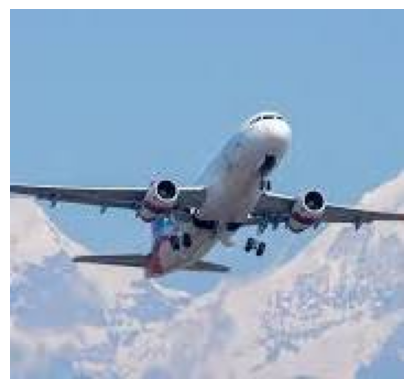

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
Standard VGG Model Prediction: airplane

Testing image: downloadd1 (4).jpeg


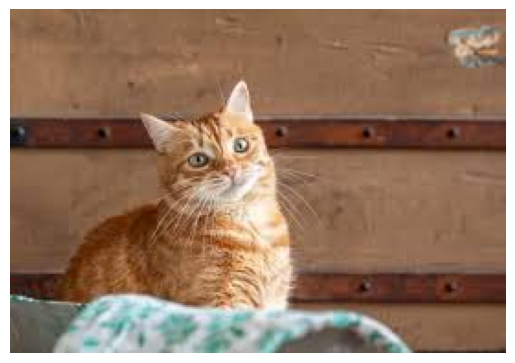

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Standard VGG Model Prediction: dog

Testing image: downloadd2 (4).jpeg


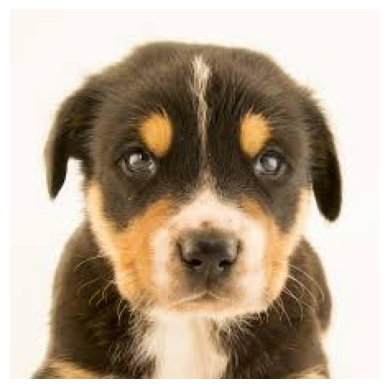

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Standard VGG Model Prediction: dog

Testing image: downloadd3 (4).jpeg


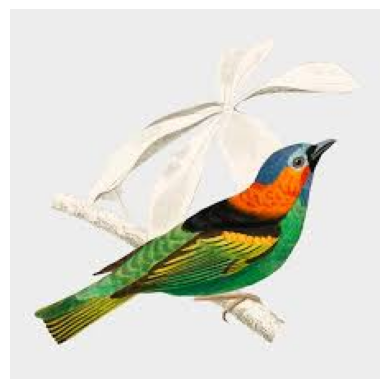

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Standard VGG Model Prediction: bird

Testing image: downloadd4 (4).jpeg


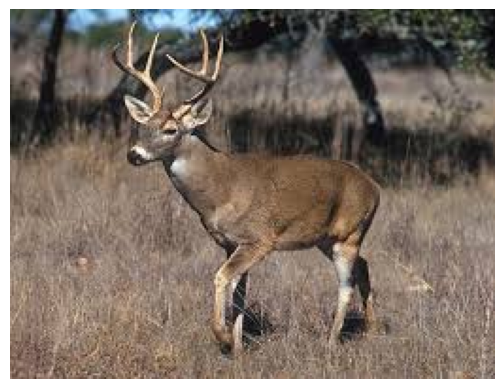

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Standard VGG Model Prediction: deer

Testing image: downloadd5 (4).jpeg


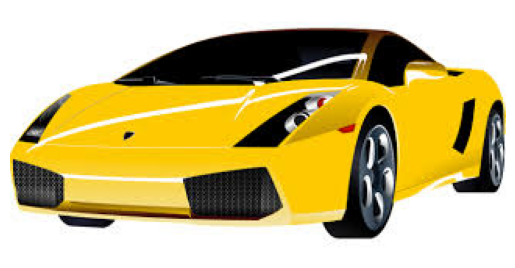

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Standard VGG Model Prediction: automobile

Testing image: downloadd6 (2).jpeg


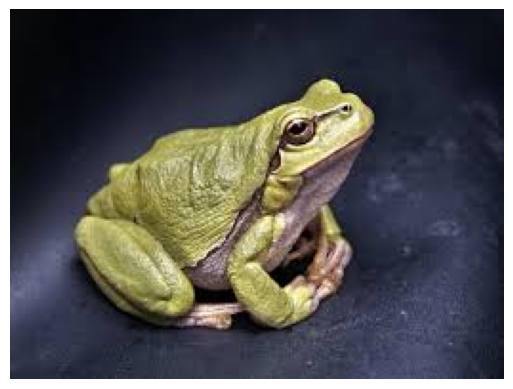

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Standard VGG Model Prediction: frog

Testing image: downloadd7 (2).jpeg


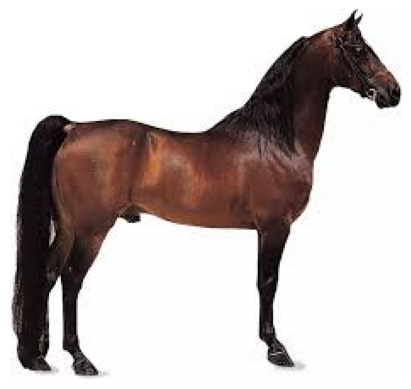

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Standard VGG Model Prediction: horse

Testing image: downloadd8 (2).jpeg


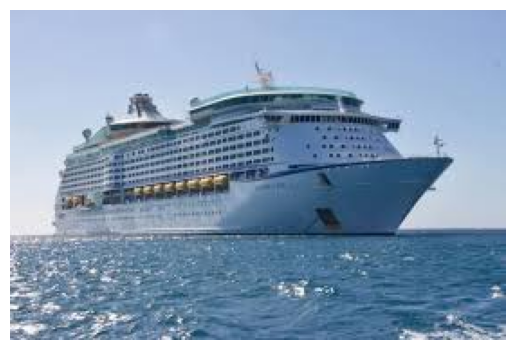

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Standard VGG Model Prediction: ship

Testing image: downloadd9 (2).jpeg


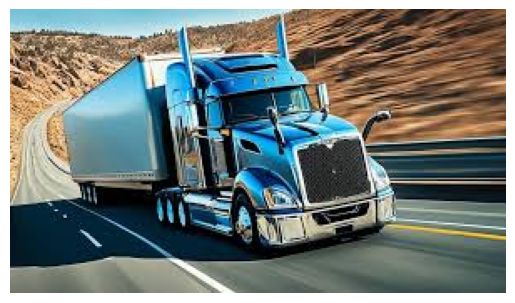

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Standard VGG Model Prediction: truck


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions

# CIFAR-10 class names
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Function to preprocess an uploaded image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(32, 32))  # Resize to 32x32
    img_array = img_to_array(img)
    img_array = img_array.astype("float32") / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict and display results
def predict_image(model, image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return cifar10_classes[predicted_class]

# Upload images
uploaded_files = files.upload()  # Use Colab to upload images

# Test the uploaded images on both models
for filename in uploaded_files:
    print(f"\nTesting image: {filename}")
    image_path = filename
    plt.imshow(load_img(image_path))
    plt.axis("off")
    plt.show()

    # Predict using standard VGG model
    result_standard = predict_image(standard_vgg, image_path)
    print(f"Standard VGG Model Prediction: {result_standard}")



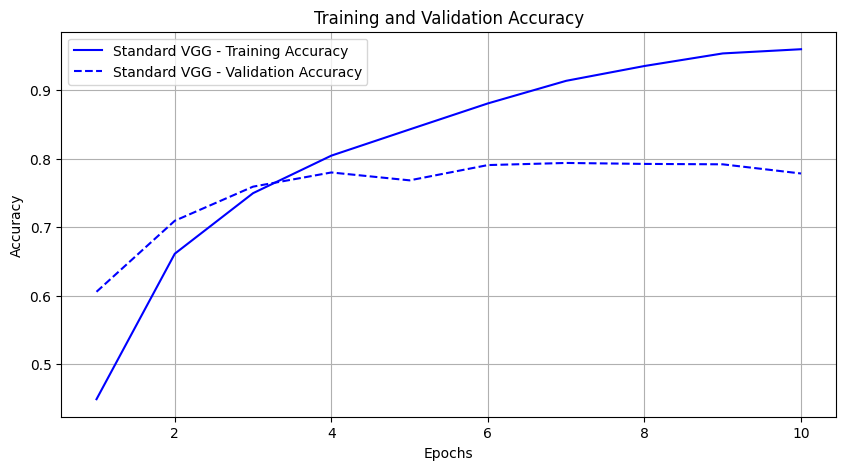

In [10]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy
def plot_training_history(history_standard):
    # Extract accuracy values for standard VGG model
    standard_train_acc = history_standard.history['accuracy']
    standard_val_acc = history_standard.history['val_accuracy']

    epochs = range(1, len(standard_train_acc) + 1)

    # Plot training accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, standard_train_acc, 'b-', label='Standard VGG - Training Accuracy')
    plt.plot(epochs, standard_val_acc, 'b--', label='Standard VGG - Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history_standard)  # Plot for both models


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [13]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Optionally, split the training data into training and validation sets
validation_split = 0.2
X_val = X_train[int(len(X_train) * (1 - validation_split)):]
y_val = y_train[int(len(y_train) * (1 - validation_split)):]
X_train = X_train[:int(len(X_train) * (1 - validation_split))]
y_train = y_train[:int(len(y_train) * (1 - validation_split))]

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [14]:
def create_depthwise_vgg11():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model


In [15]:
# Create the model
model_indepth = create_depthwise_vgg11()

# Compile the model
model_indepth.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_indepth.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,248,202 (12.39 MB)

 Trainable params: 3,248,202 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model on the training data and validate on validation data
history = model_indepth.fit(
    X_train, y_train,              # Training data
    epochs=10,                     # Number of epochs
    batch_size=32,                 # Batch size
    validation_data=(X_val, y_val),# Validation data
    verbose=1                      # Show training progress
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.2757 - loss: 1.9286 - val_accuracy: 0.5119 - val_loss: 1.3436
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5477 - loss: 1.2547 - val_accuracy: 0.6417 - val_loss: 1.0133
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6485 - loss: 0.9959 - val_accuracy: 0.6727 - val_loss: 0.9125
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7074 - loss: 0.8256 - val_accuracy: 0.6854 - val_loss: 0.8965
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7538 - loss: 0.7030 - val_accuracy: 0.7298 - val_loss: 0.7810
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7875 - loss: 0.6006 - val_accuracy: 0.7413 - val_loss: 0.7676
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8156 - loss: 0.5233 - val_accuracy: 0.7573 - val_loss: 0.7308
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8393 - loss: 

In [17]:
# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the final training and validation accuracies
print(f"Final Training Accuracy: {train_accuracy[-1]}")
print(f"Final Validation Accuracy: {val_accuracy[-1]}")


Final Training Accuracy: 0.8670250177383423
Final Validation Accuracy: 0.7601000070571899


In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_indepth.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7510 - loss: 0.8624
Test Loss: 0.8880345821380615, Test Accuracy: 0.7429999709129333


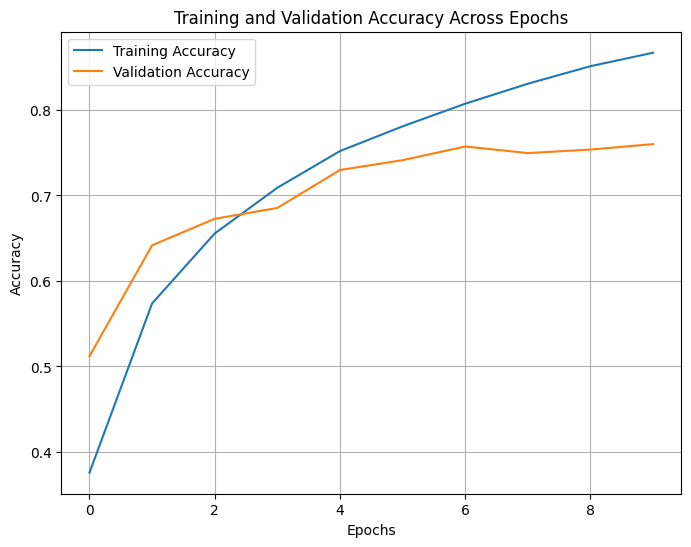

In [19]:
# Plot the accuracy across epochs
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Saving downloadd0.jpeg to downloadd0 (5).jpeg
Saving downloadd1.jpeg to downloadd1 (5).jpeg
Saving downloadd2.jpeg to downloadd2 (5).jpeg
Saving downloadd3.jpeg to downloadd3 (5).jpeg
Saving downloadd4.jpeg to downloadd4 (5).jpeg
Saving downloadd5.jpeg to downloadd5 (5).jpeg
Saving downloadd6.jpeg to downloadd6 (3).jpeg
Saving downloadd7.jpeg to downloadd7 (3).jpeg
Saving downloadd8.jpeg to downloadd8 (3).jpeg
Saving downloadd9.jpeg to downloadd9 (3).jpeg

Testing image: downloadd0 (5).jpeg


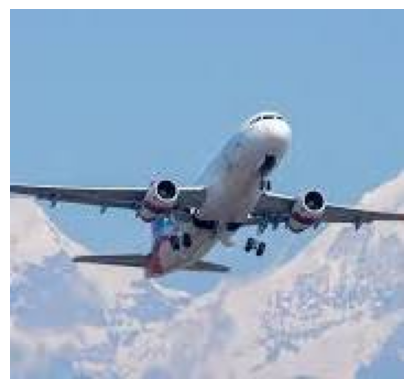

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
indepth VGG Model Prediction: airplane

Testing image: downloadd1 (5).jpeg


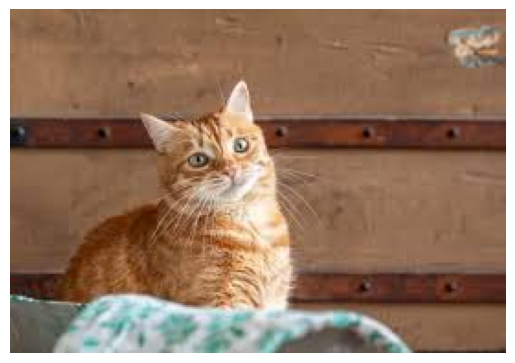

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
indepth VGG Model Prediction: cat

Testing image: downloadd2 (5).jpeg


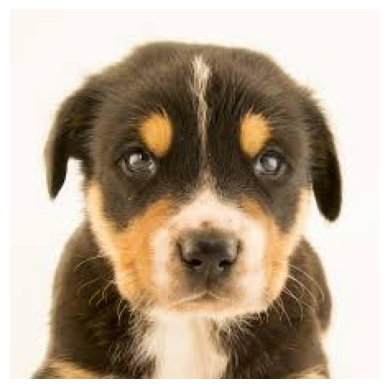

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
indepth VGG Model Prediction: dog

Testing image: downloadd3 (5).jpeg


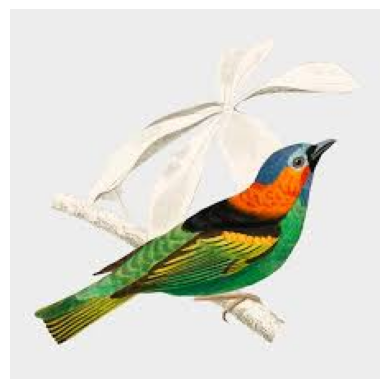

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
indepth VGG Model Prediction: airplane

Testing image: downloadd4 (5).jpeg


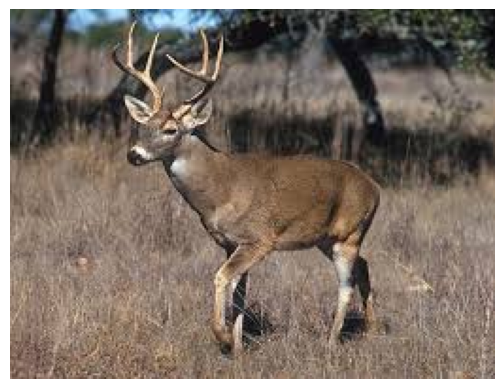

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
indepth VGG Model Prediction: deer

Testing image: downloadd5 (5).jpeg


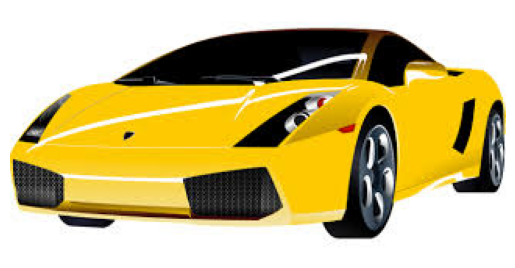

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
indepth VGG Model Prediction: automobile

Testing image: downloadd6 (3).jpeg


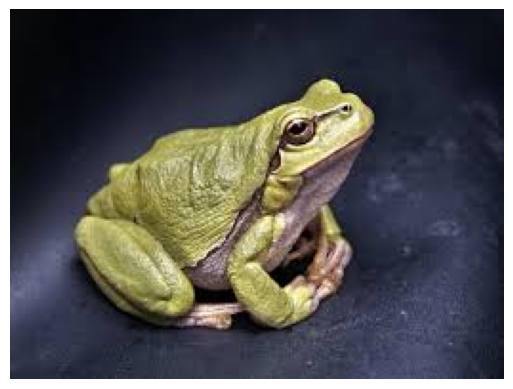

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
indepth VGG Model Prediction: frog

Testing image: downloadd7 (3).jpeg


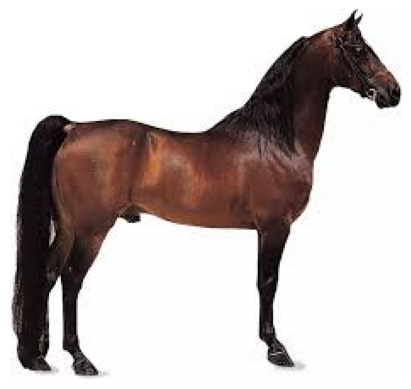

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
indepth VGG Model Prediction: horse

Testing image: downloadd8 (3).jpeg


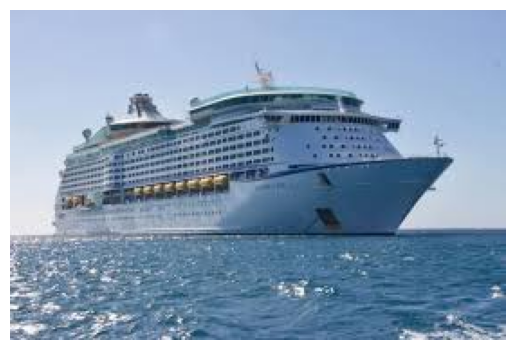

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
indepth VGG Model Prediction: ship

Testing image: downloadd9 (3).jpeg


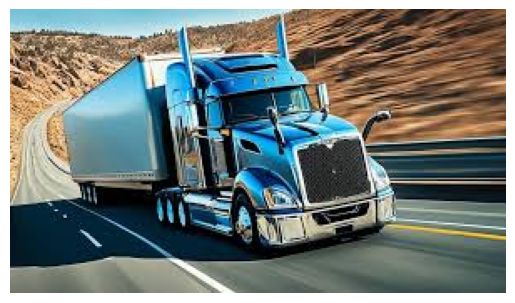

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
indepth VGG Model Prediction: truck


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions

# CIFAR-10 class names
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Function to preprocess an uploaded image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(32, 32))  # Resize to 32x32
    img_array = img_to_array(img)
    img_array = img_array.astype("float32") / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict and display results
def predict_image(model, image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return cifar10_classes[predicted_class]

# Upload images
uploaded_files = files.upload()  # Use Colab to upload images

# Test the uploaded images on both models
for filename in uploaded_files:
    print(f"\nTesting image: {filename}")
    image_path = filename
    plt.imshow(load_img(image_path))
    plt.axis("off")
    plt.show()

    # Predict using standard VGG model
    result_standard = predict_image(model_indepth, image_path)
    print(f"indepth VGG Model Prediction: {result_standard}")

